In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [52]:
Volatile_Chemical_Corporation_data = {
    "Day": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Price": [100, 113, 110, 85, 105, 102, 86, 63, 81, 101, 94, 106, 101, 79, 94, 90, 97],
    "Change": [0 , 13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
}

In [53]:
data = pd.DataFrame(Volatile_Chemical_Corporation_data)

In [54]:
data

,Day,Price,Change
0,0,100,0
1,1,113,13
2,2,110,-3
3,3,85,-25
4,4,105,20
5,5,102,-3
6,6,86,-16
7,7,63,-23
8,8,81,18
9,9,101,20


In [55]:
Change = np.array(data["Change"])

In [56]:
print(Change)

[  0  13  -3 -25  20  -3 -16 -23  18  20  -7  12  -5 -22  15  -4   7]


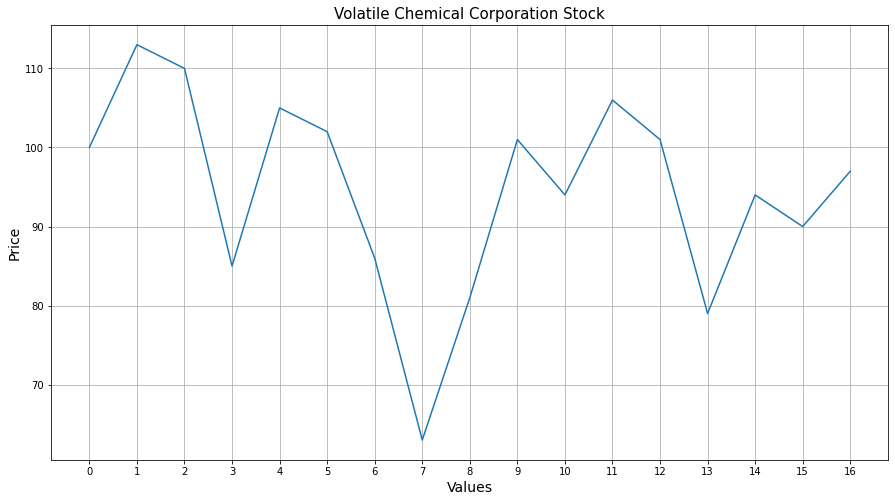

In [57]:
plt.figure(figsize=(15,8))
plt.xlabel("Values", size=14)
plt.ylabel("Price", size=14)
plt.title("Volatile Chemical Corporation Stock", size=15)
plt.plot(data["Day"], data["Price"])
plt.xticks(data["Day"])
plt.grid()

plt.show()

In [58]:
def find_max_crossing_subarray(array, start, mid, end):
   
    sum_left = float('-inf')
    sum_temp = 0
    cross_start = mid
    for i in range(mid - 1, start - 1, -1):
        sum_temp = sum_temp + array[i]
        if sum_temp > sum_left:
            sum_left = sum_temp
            cross_start = i
 
    sum_right = float('-inf')
    sum_temp = 0
    cross_end = mid + 1
    for i in range(mid, end):
        sum_temp = sum_temp + array[i]
        if sum_temp > sum_right:
            sum_right = sum_temp
            cross_end = i + 1
    return cross_start, cross_end, sum_left + sum_right

In [59]:
def find_max_subarray(array, start, end):
  
    # base case
    if start == end - 1:
        return start, end, array[start]
    else:
        mid = (start + end)//2
        left_start, left_end, left_max = find_max_subarray(array, start, mid)
        right_start, right_end, right_max = find_max_subarray(array, mid, end)
        cross_start, cross_end, cross_max = find_max_crossing_subarray(array, start, mid, end)
        if (left_max > right_max and left_max > cross_max):
            return left_start, left_end, left_max
        elif (right_max > left_max and right_max > cross_max):
            return right_start, right_end, right_max
        else:
            return cross_start, cross_end, cross_max

In [60]:
array = Change
start, end, maximum = find_max_subarray(alist, 0, len(alist))
print('The maximum subarray starts at index {}, ends at index {}'
      ' and has sum {}.'.format(start, end - 1, maximum))

The maximum subarray starts at index 8, ends at index 11 and has sum 43.


In [62]:
print(data["Change"])

0      0
1     13
2     -3
3    -25
4     20
5     -3
6    -16
7    -23
8     18
9     20
10    -7
11    12
12    -5
13   -22
14    15
15    -4
16     7
Name: Change, dtype: int64
